In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Disable all warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Administrator\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
#load data
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data Cleaning

In [3]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [4]:
# Calculate missing values for each column
missing_values = data.isnull().sum()
missing_values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
# Fill missing values in 'bmi' with the median value of the column
bmi_median = data['bmi'].median()
data['bmi'].fillna(bmi_median, inplace=True)

In [6]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
# Label encode categories

label_encoder = LabelEncoder()

data['gender'] = label_encoder.fit_transform(data['gender'])
data['ever_married'] = label_encoder.fit_transform(data['ever_married'])
data['work_type'] = label_encoder.fit_transform(data['work_type'])
data['Residence_type'] = label_encoder.fit_transform(data['Residence_type'])
data['smoking_status'] = label_encoder.fit_transform(data['smoking_status'])


data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [8]:
data.drop('id', axis=1, inplace=True)

In [9]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


## EDA

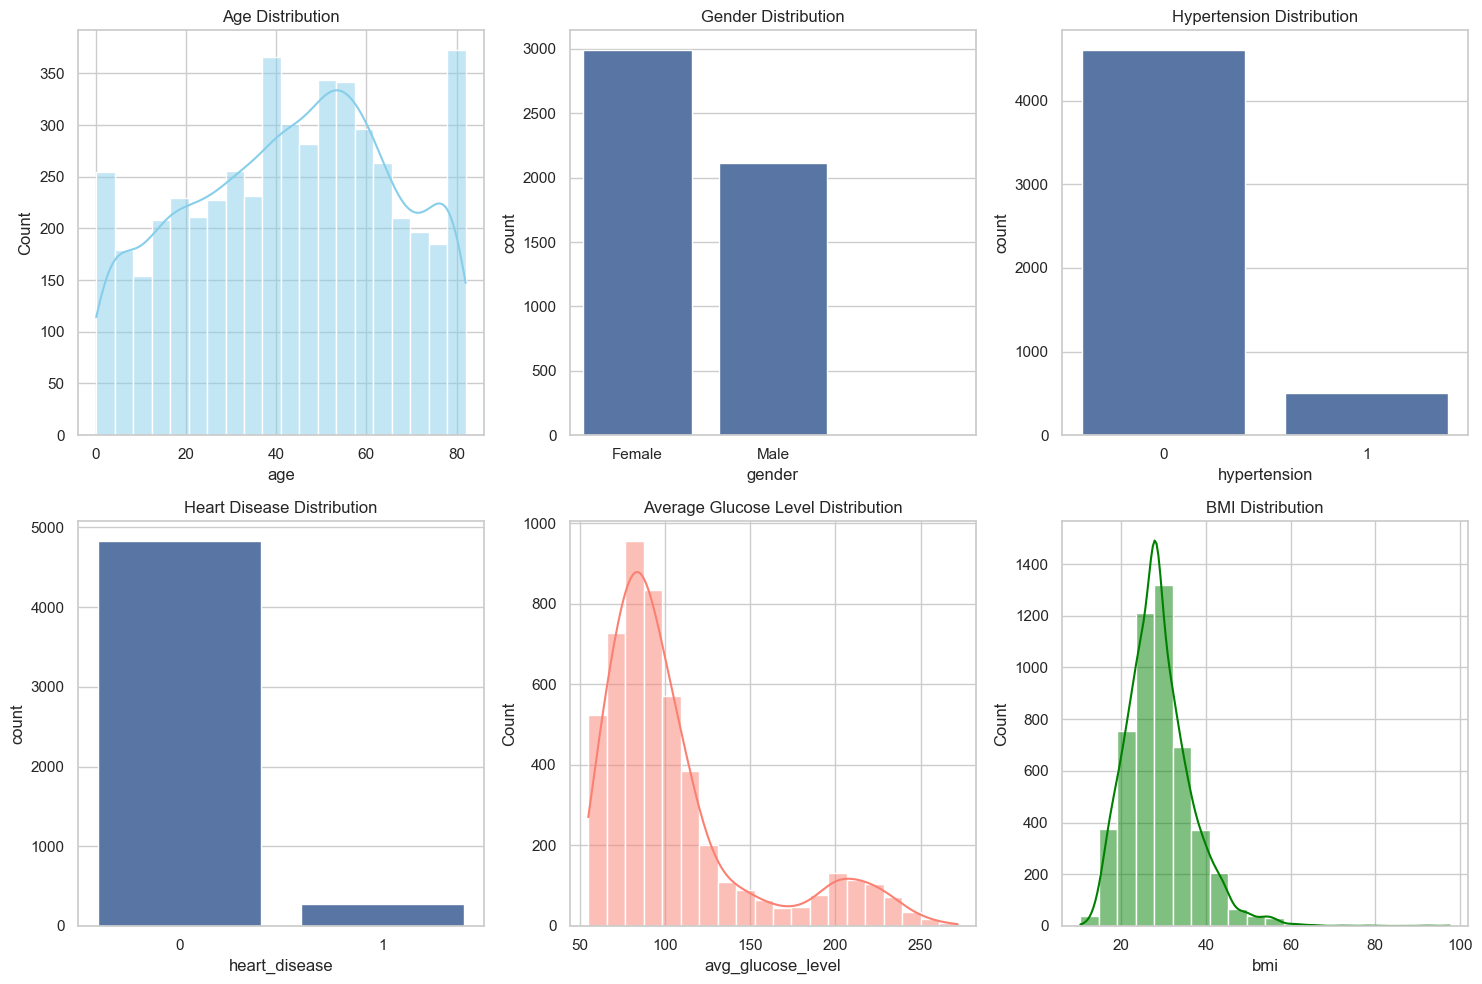

In [10]:
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(15, 10))

# Subplot 1: Age distribution
plt.subplot(2, 3, 1)
sns.histplot(data['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')

# Subplot 2: Gender distribution
plt.subplot(2, 3, 2)
sns.countplot(x='gender', data=data)
plt.title('Gender Distribution')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

# Subplot 3: Hypertension distribution
plt.subplot(2, 3, 3)
sns.countplot(x='hypertension', data=data)
plt.title('Hypertension Distribution')

# Subplot 4: Heart disease distribution
plt.subplot(2, 3, 4)
sns.countplot(x='heart_disease', data=data)
plt.title('Heart Disease Distribution')

# Subplot 5: Average glucose level distribution
plt.subplot(2, 3, 5)
sns.histplot(data['avg_glucose_level'], bins=20, kde=True, color='salmon')
plt.title('Average Glucose Level Distribution')

# Subplot 6: BMI distribution
plt.subplot(2, 3, 6)
sns.histplot(data['bmi'], bins=20, kde=True, color='green')
plt.title('BMI Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## PCA

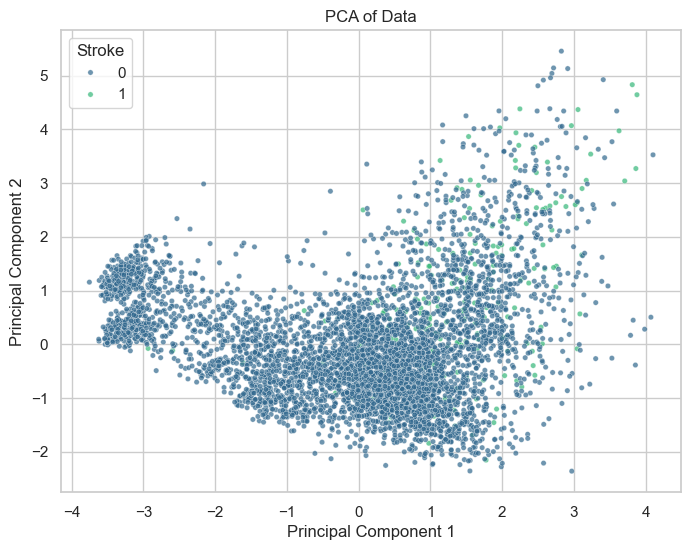

In [15]:
X_data = data.drop(columns=['stroke'])

# standardize the data
scaler = StandardScaler()
X_data_scaled = scaler.fit_transform(X_data)

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_data_scaled)

# 2d PCA results
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
pca_df['Stroke'] = data['stroke'].values

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Stroke', data=pca_df, palette='viridis',s=15,  alpha=0.7)
plt.title('PCA of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Stroke')
plt.grid(True)
plt.show()

## Logisitic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [13]:
X = data.drop('stroke', axis=1)
y = data['stroke']

# Initialize the logistic regression model
model = LogisticRegression()

# Perform 10-fold cross-validation with logistic regression model
cv_scores = cross_val_score(model, X, y, cv=10)
print("Accuracy:",cv_scores.mean())

Accuracy: 0.9516634050880626


In [14]:
# Initialize the logistic regression model with L2 regularization 
model_reg_l2 = LogisticRegression(penalty='l2', C=10)

# Perform 10-fold cross-validation with L2 regularization
cv_scores_l2 = cross_val_score(model_reg_l2, X, y, cv=10)
print("Accuracy:",cv_scores_l2.mean())

Accuracy: 0.9512720156555773
